Kornpob Bhirombhakdi, kbhirombhakdi@stsci.edu

# Story
We would like to remove contamination of X01 from GRB 190829A at epochs 201909 and 201910, both G102 and G141.

# Previously
We developed HSTPHOT 1.2.0, which can perform basic aperture photometry. The reason for doing this was because we aimed to verify whether X01 can be considered as a stable star.

# Resources
- HSTPHOT (pip install hstphot)
- WFC3 IR images of X01 in the field of GRB 190829A from proposal ID 15089 and 15510, which can be downloaded from [MAST](https://archive.stsci.edu/).

# Task
- Locate X01 in all frames, and record it in ds9 region files.
- Perform photometry on X01.
- Check star databases such as [SIMBAD](http://simbad.u-strasbg.fr/simbad/) and [VizieR](https://cdsarc.u-strasbg.fr/) for X01.

# PhotApCorr IR
- circular radius in pix = average light collected
 - 4 pix = 85%
 - 5 pix = 87%
 - 6 pix = 90%
 
# PhotApCorr UVIS
- circular radius in pix = average light collected
 - 5 pix = 85%
 - 6.25 pix = 87%
 - 10 pix = 90%
 - 25 pix = 95%



In [1]:
from hstphot.read_ds9region import read_ds9region
from hstphot.container import Container
from hstphot.cutout2d import Cutout2d
from hstphot.objectmask import ObjectMask
from hstphot.background import Background
from hstphot.apphot import ApPhot
from hstphot.phot2abmag import Phot2ABmag
from hstphot.mag2flux import mag2flux
from hstphot.to_fullframe import to_fullframe
from hstphot.show_source import show_source
from hstphot.show_sum1d import show_sum1d
from mag2flux.mag2flux import mag2flux
from drizzlepac.astrodrizzle import AstroDrizzle
from astropy.io import fits
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import glob,copy


The following task in the stsci.skypac package can be run with TEAL:
                                    skymatch                                    
The following tasks in the drizzlepac package can be run with TEAL:
    astrodrizzle       config_testbed      imagefindpars           mapreg       
       photeq            pixreplace           pixtopix            pixtosky      
  refimagefindpars       resetbits          runastrodriz          skytopix      
     tweakback            tweakreg           updatenpol


In [2]:
PID = ['15089_IR','15510_IR']
search_path_drz = ['/Users/kbhirombhakdi/_work/_data/15089/direct_drz/*/*drz.fits',
                   '/Users/kbhirombhakdi/_work/_data/15510/direct_drz/*/idwbk*drz.fits'
                  ]
filelist = {}
for ii,i in enumerate(PID):
    t = glob.glob(search_path_drz[ii])
    filelist[i] = t
    
search_path_drc = '/Users/kbhirombhakdi/_work/_data/15510/direct_drz/*/*drc.fits'
t = glob.glob(search_path_drc)
filelist['15510_UVIS'] = t
PID.append('15510_UVIS')

filelist


{'15089_IR': ['/Users/kbhirombhakdi/_work/_data/15089/direct_drz/idlk03010/idlk03010_drz.fits',
  '/Users/kbhirombhakdi/_work/_data/15089/direct_drz/idlk02010/idlk02010_drz.fits',
  '/Users/kbhirombhakdi/_work/_data/15089/direct_drz/idlk01010/idlk01010_drz.fits',
  '/Users/kbhirombhakdi/_work/_data/15089/direct_drz/idlk04010/idlk04010_drz.fits'],
 '15510_IR': ['/Users/kbhirombhakdi/_work/_data/15510/direct_drz/idwbk6010/idwbk6010_drz.fits',
  '/Users/kbhirombhakdi/_work/_data/15510/direct_drz/idwbk3z6q/idwbk3z6q_drz.fits',
  '/Users/kbhirombhakdi/_work/_data/15510/direct_drz/idwbk5luq/idwbk5luq_drz.fits',
  '/Users/kbhirombhakdi/_work/_data/15510/direct_drz/idwbk5m0q/idwbk5m0q_drz.fits',
  '/Users/kbhirombhakdi/_work/_data/15510/direct_drz/idwbk3z0q/idwbk3z0q_drz.fits',
  '/Users/kbhirombhakdi/_work/_data/15510/direct_drz/idwbk4010/idwbk4010_drz.fits'],
 '15510_UVIS': ['/Users/kbhirombhakdi/_work/_data/15510/direct_drz/idwbp5020/idwbp5020_drc.fits',
  '/Users/kbhirombhakdi/_work/_data/

In [3]:
ds9list = {}
for i in filelist:
    t = filelist[i]
    tt = []
    for j in t:
        string = '/'.join(j.split('/')[0:-1]) + '/ds9.reg'
        tt.append(string)
    ds9list[i] = tt
ds9list


{'15089_IR': ['/Users/kbhirombhakdi/_work/_data/15089/direct_drz/idlk03010/ds9.reg',
  '/Users/kbhirombhakdi/_work/_data/15089/direct_drz/idlk02010/ds9.reg',
  '/Users/kbhirombhakdi/_work/_data/15089/direct_drz/idlk01010/ds9.reg',
  '/Users/kbhirombhakdi/_work/_data/15089/direct_drz/idlk04010/ds9.reg'],
 '15510_IR': ['/Users/kbhirombhakdi/_work/_data/15510/direct_drz/idwbk6010/ds9.reg',
  '/Users/kbhirombhakdi/_work/_data/15510/direct_drz/idwbk3z6q/ds9.reg',
  '/Users/kbhirombhakdi/_work/_data/15510/direct_drz/idwbk5luq/ds9.reg',
  '/Users/kbhirombhakdi/_work/_data/15510/direct_drz/idwbk5m0q/ds9.reg',
  '/Users/kbhirombhakdi/_work/_data/15510/direct_drz/idwbk3z0q/ds9.reg',
  '/Users/kbhirombhakdi/_work/_data/15510/direct_drz/idwbk4010/ds9.reg'],
 '15510_UVIS': ['/Users/kbhirombhakdi/_work/_data/15510/direct_drz/idwbp5020/ds9.reg',
  '/Users/kbhirombhakdi/_work/_data/15510/direct_drz/idwbp5010/ds9.reg',
  '/Users/kbhirombhakdi/_work/_data/15510/direct_drz/idwbp6020/ds9.reg',
  '/Users/k

In [4]:
idlist = {}
for i in filelist:
    t = filelist[i]
    tt = []
    for j in t:
        th = fits.open(j)[0].header
        rootname = th['ROOTNAME']
        if i=='15510_UVIS':
            rootname = rootname.split('_')[0]
        dateobs = ''.join(th['DATE-OBS'].split('-')[:])
        filterobs = th['FILTER']
        string = '{0}_{1}_{2}'.format(rootname,dateobs,filterobs)
        tt.append(string)
    idlist[i] = tt
idlist
        

{'15089_IR': ['idlk03010_20191026_F110W',
  'idlk02010_20190928_F160W',
  'idlk01010_20190928_F110W',
  'idlk04010_20191026_F160W'],
 '15510_IR': ['idwbk6010_20200112_F140W',
  'idwbk3z6q_20191129_F125W',
  'idwbk5luq_20200112_F105W',
  'idwbk5m0q_20200112_F125W',
  'idwbk3z0q_20191129_F105W',
  'idwbk4010_20191130_F140W'],
 '15510_UVIS': ['idwbp5020_20191125_F814W',
  'idwbp5010_20191125_F606W',
  'idwbp6020_20200112_F814W',
  'idwbp6010_20200112_F606W']}

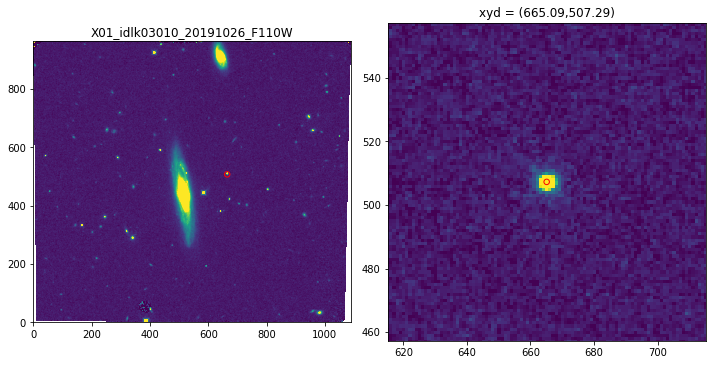

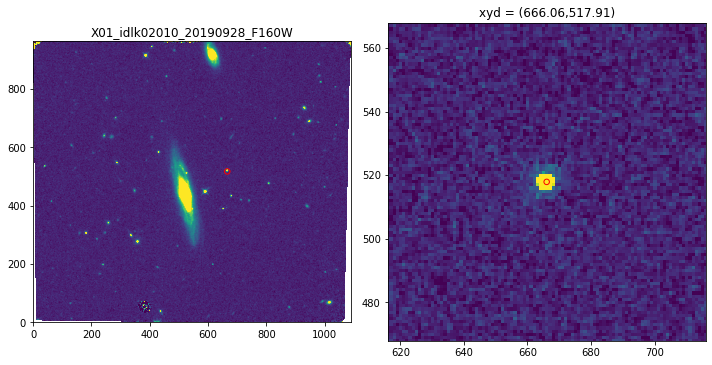

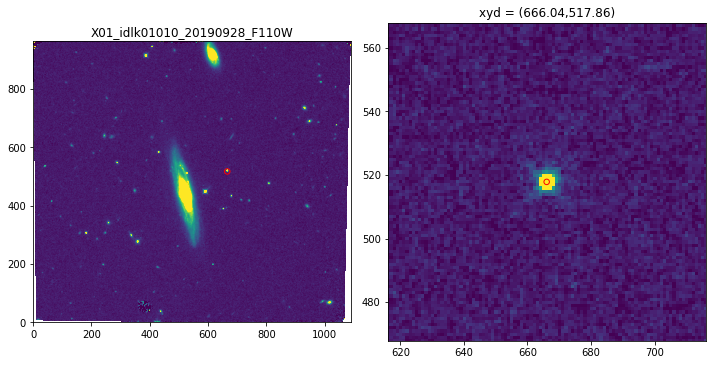

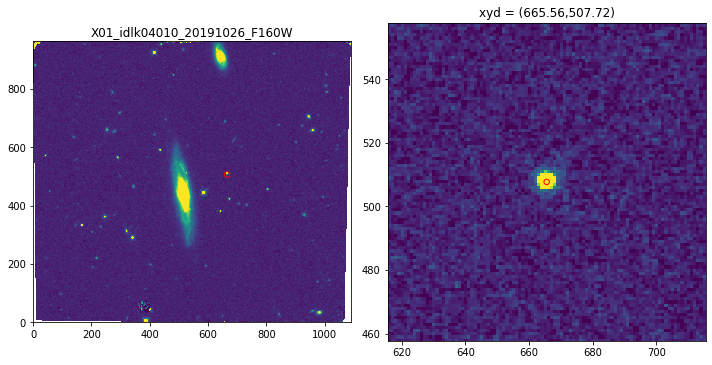

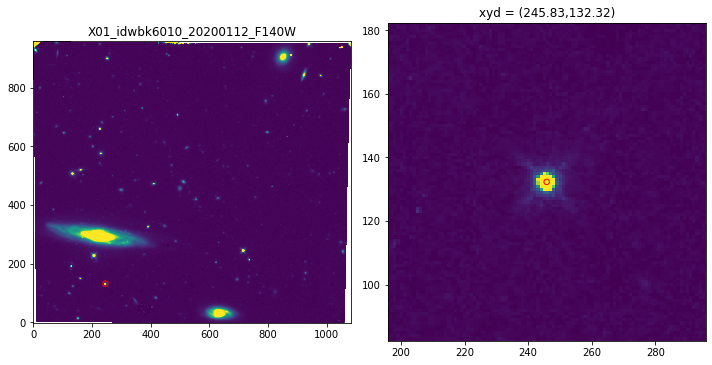

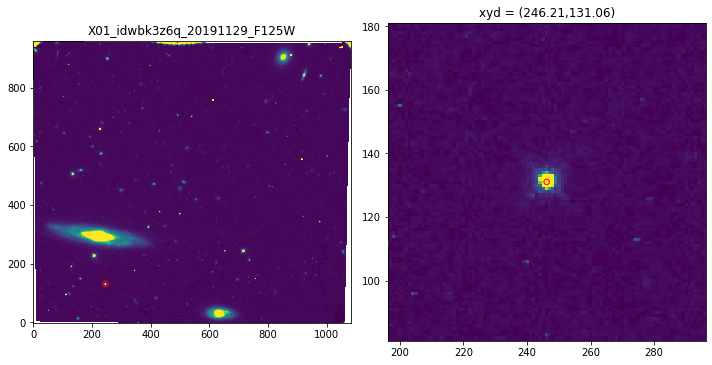

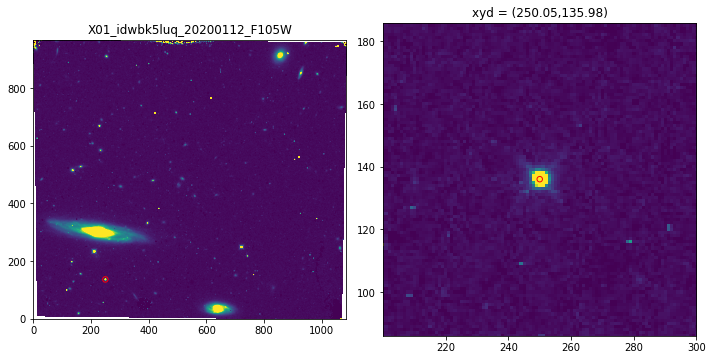

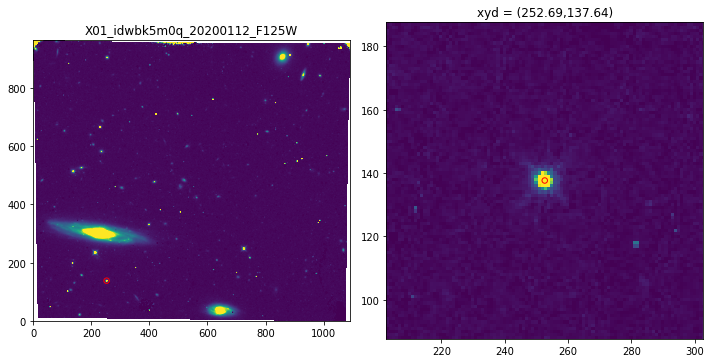

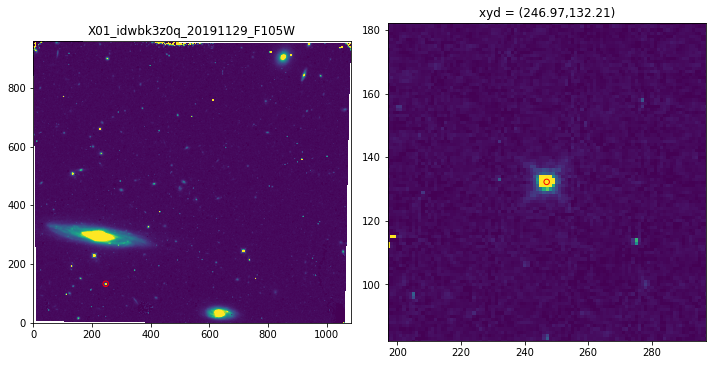

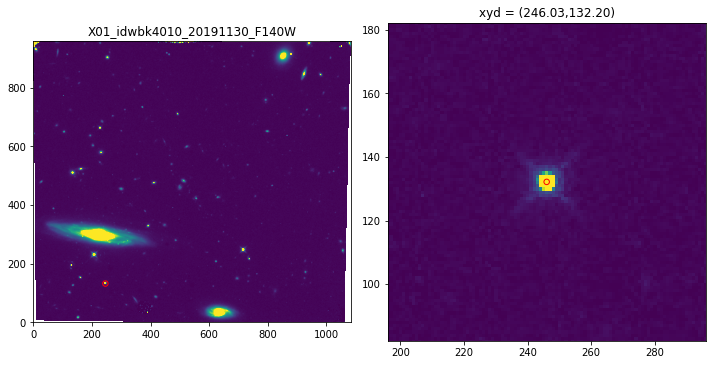

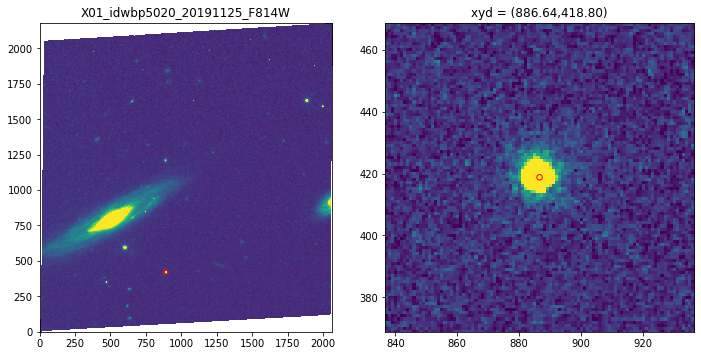

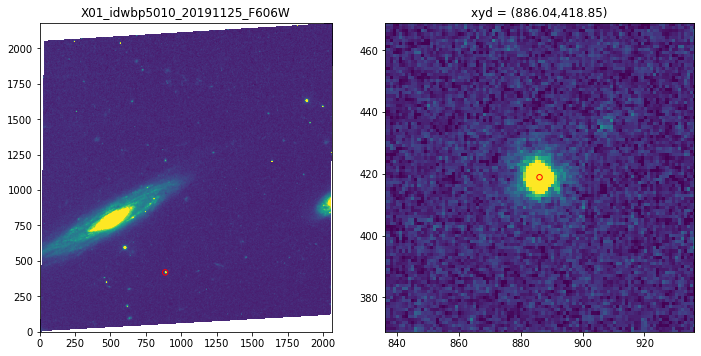

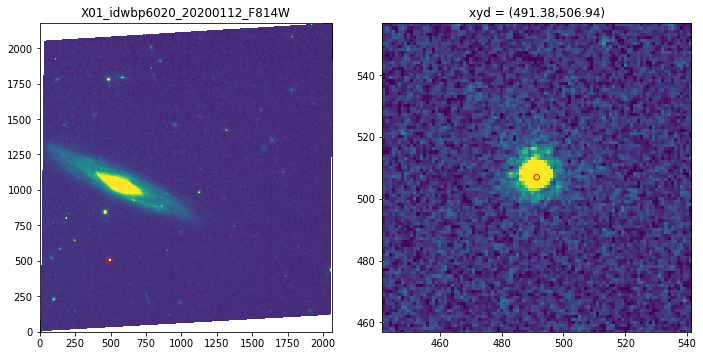

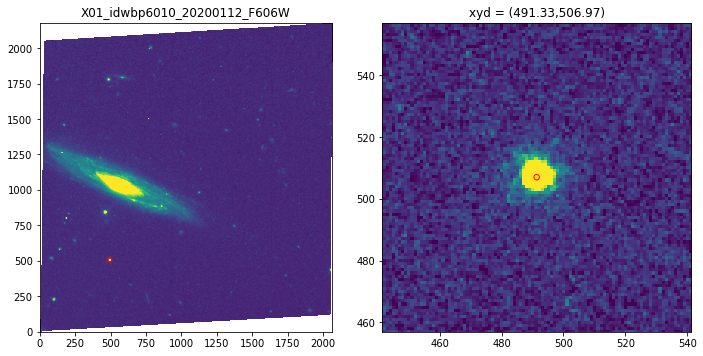

In [5]:
sourcename = 'X01'
for i in filelist:
    for jj,j in enumerate(filelist[i]):
        ds9file = ds9list[i][jj]
        identifier = idlist[i][jj]
        dfile = (filelist[i][jj],1)
        xyd = read_ds9region(ds9file)[sourcename] - np.array([1.,1.])
        th = fits.open(dfile[0])[0].header
        title = '{0}_{1}'.format(sourcename,identifier)
        show_source(dfile,xyd,title,save=False,container=None)
        

In [6]:
sourcename = 'X01'
xydlist = {}
for i in filelist:
    tt = []
    for jj,j in enumerate(filelist[i]):
        ds9file = ds9list[i][jj]
        identifier = idlist[i][jj]
        dfile = (filelist[i][jj],1)
        t = read_ds9region(ds9file)[sourcename] - np.array([1.,1.])
        tt.append(t)
    xydlist[i] = tt
xydlist


{'15089_IR': [array([665.08871, 507.29012]),
  array([666.05788, 517.91191]),
  array([666.03565, 517.85675]),
  array([665.56435, 507.71949])],
 '15510_IR': [array([245.82931, 132.31561]),
  array([246.20847, 131.06266]),
  array([250.05298, 135.98347]),
  array([252.68539, 137.64259]),
  array([246.9691 , 132.21062]),
  array([246.03044, 132.19551])],
 '15510_UVIS': [array([886.63866, 418.79969]),
  array([886.04271, 418.85305]),
  array([491.38095, 506.94336]),
  array([491.32718, 506.97424])]}

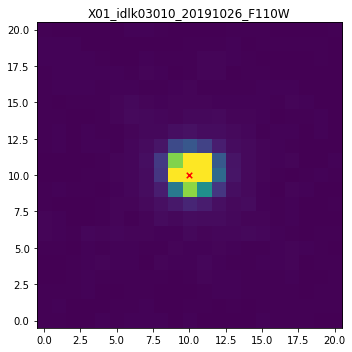

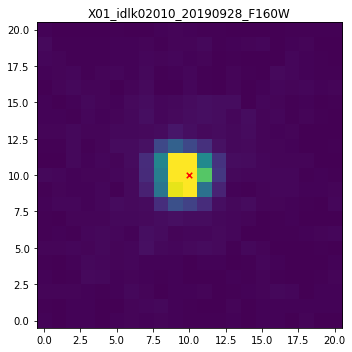

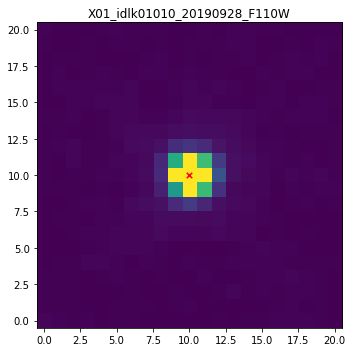

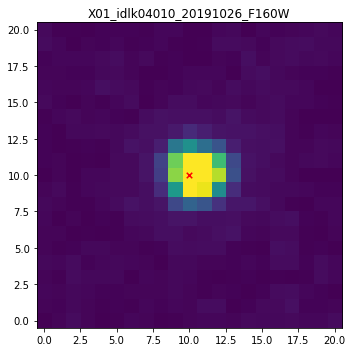

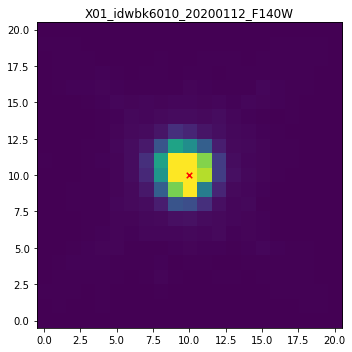

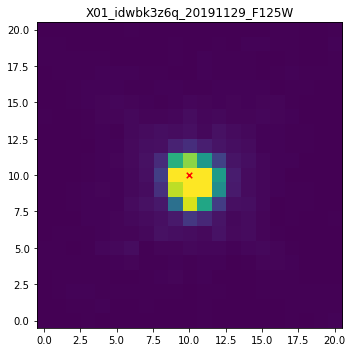

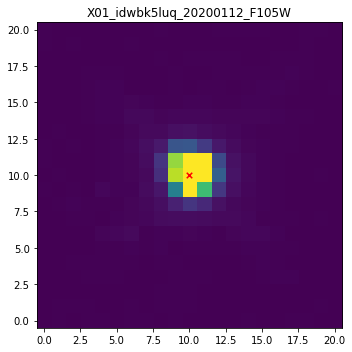

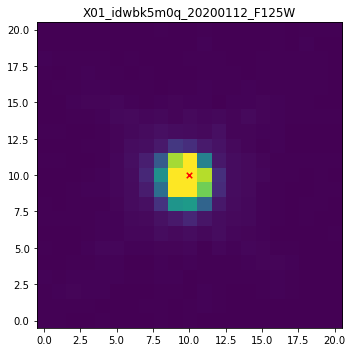

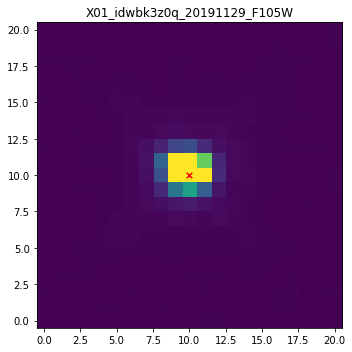

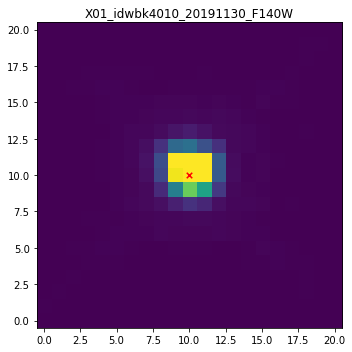

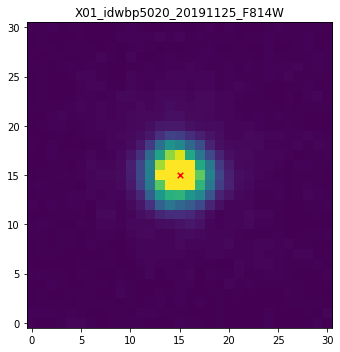

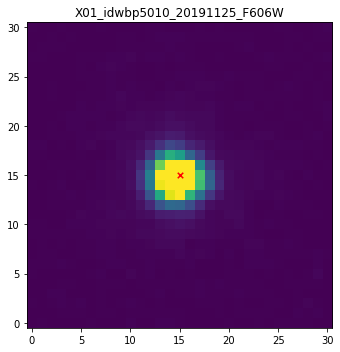

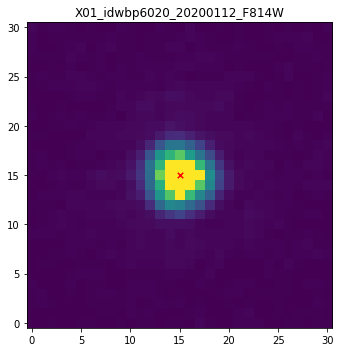

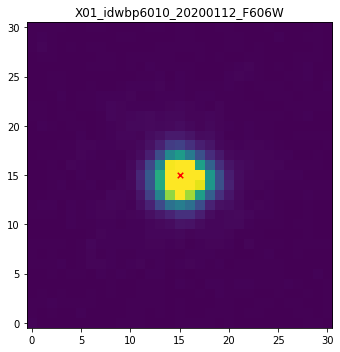

In [7]:
##########
# cutout
##########
cutsize = {'15089_IR':(10,10),
       '15510_IR':(10,10),
       '15510_UVIS':(15,15)
      }
xyd_adjust = {'15089_IR':[(0.,0.),(0.,1.),(0.,1.),(0.,1.)],
              '15510_IR':[(1.,0.),(0.,1.),(0.,1.),(1.,1.),(1.,0.),(0.,0.)],
              '15510_UVIS':[(0.,1.),(0.,1.),(0.,2.),(0.,2.)]
             }
sourcename = 'X01'
centerlist = {}
cutoutlist = {}
for i in filelist:
    tt = []
    tcut = []
    for jj,j in enumerate(filelist[i]):
        identifier = idlist[i][jj]
        title = '{0}_{1}'.format(sourcename,identifier)
        center = xydlist[i][jj] + xyd_adjust[i][jj]
        data = fits.open(filelist[i][jj])[1].data
        dx,dy = cutsize[i]
        t = Cutout2d(data,center,dx,dy)
        t.show(title,save=False)
        tt.append(center - np.array([t.bb0x,t.bb0y]))
        tcut.append(t)
    centerlist[i] = tt
    cutoutlist[i] = tcut
        

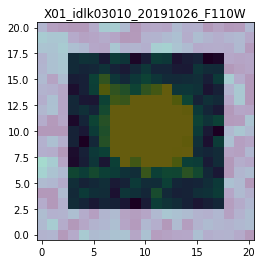

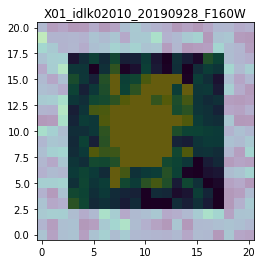

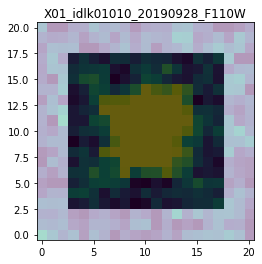

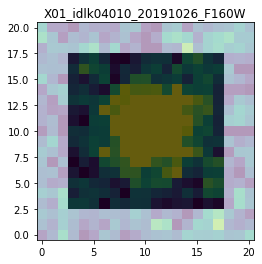

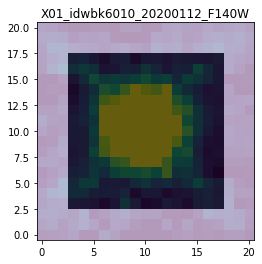

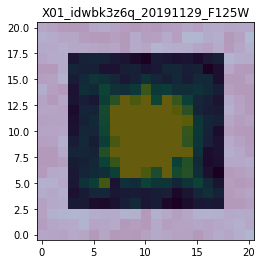

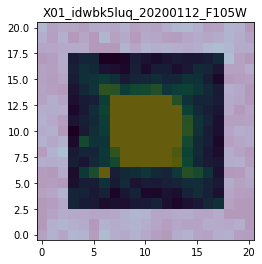

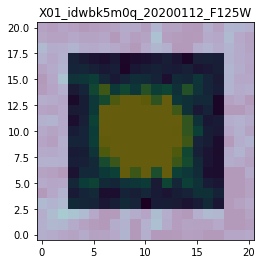

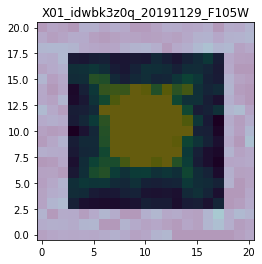

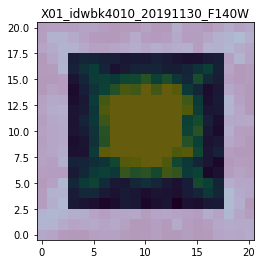

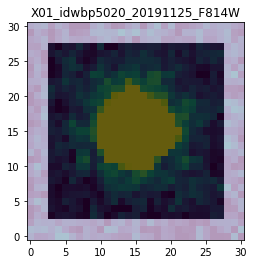

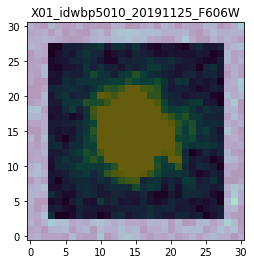

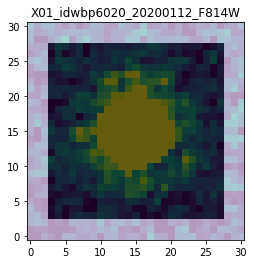

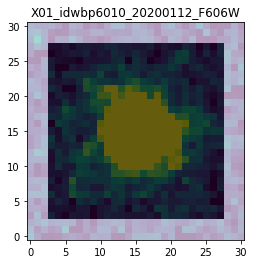

In [8]:
##########
# object mask
##########
masksize = {'15089_IR':(7,7),
       '15510_IR':(7,7),
       '15510_UVIS':(12,12)
      }
sourcename = 'X01'
masklist = {}
for i in filelist:
    tt = []
    for jj,j in enumerate(filelist[i]):
        identifier = idlist[i][jj]
        title = '{0}_{1}'.format(sourcename,identifier)
        center = centerlist[i][jj]
        data = cutoutlist[i][jj].cut
        dx,dy = masksize[i]
        t = ObjectMask(data,center,dx,dy)
        t.compute()
        tt.append(t)
        ##### show #####
        plt.figure()
        m = np.isfinite(data)
        vmin,vmax = np.percentile(data[m],5.),np.percentile(data[m],90.)
        plt.imshow(data,origin='lower',cmap='viridis',vmin=vmin,vmax=vmax)
        plt.imshow(t.mask,origin='lower',cmap='Greys',alpha=0.6)
        plt.title(title,fontsize=12)
    masklist[i] = tt  
        

In [9]:
##########
# background
##########
norderlist = {'15089_IR':0,
       '15510_IR':0,
       '15510_UVIS':0
      }
sourcename = 'X01'
bkglist = {}
for i in filelist:
    tt = []
    for jj,j in enumerate(filelist[i]):
        identifier = idlist[i][jj]
        title = '{0}_{1}'.format(sourcename,identifier)
        gdata = cutoutlist[i][jj].cut
        norder = norderlist[i]
        mdata = masklist[i][jj].mask
        t = Background(gdata,norder,mdata)
        t.poly2d.fit()
        tt.append(t)
    bkglist[i] = tt  
        

Rescale = True

Exclude 0 invalid data points
data_minmax = (0.0,20.0) : scale_minmax = (-1.0,1.0) : method = linear

Exclude 0 invalid data points
data_minmax = (0.0,20.0) : scale_minmax = (-1.0,1.0) : method = linear

Exclude 0 invalid data points
data_minmax = (0.7360478043556213,143.65121459960938) : scale_minmax = (-1.0,1.0) : method = linear
Rescale = False
Perform fit
Perform compute
Sigma clipping = False
Rescale = True

Exclude 0 invalid data points
data_minmax = (0.0,20.0) : scale_minmax = (-1.0,1.0) : method = linear

Exclude 0 invalid data points
data_minmax = (0.0,20.0) : scale_minmax = (-1.0,1.0) : method = linear

Exclude 0 invalid data points
data_minmax = (0.2657548189163208,75.17721557617188) : scale_minmax = (-1.0,1.0) : method = linear
Rescale = False
Perform fit
Perform compute
Sigma clipping = False
Rescale = True

Exclude 0 invalid data points
data_minmax = (0.0,20.0) : scale_minmax = (-1.0,1.0) : method = linear

Exclude 0 invalid data points
data_minmax = (0.0,

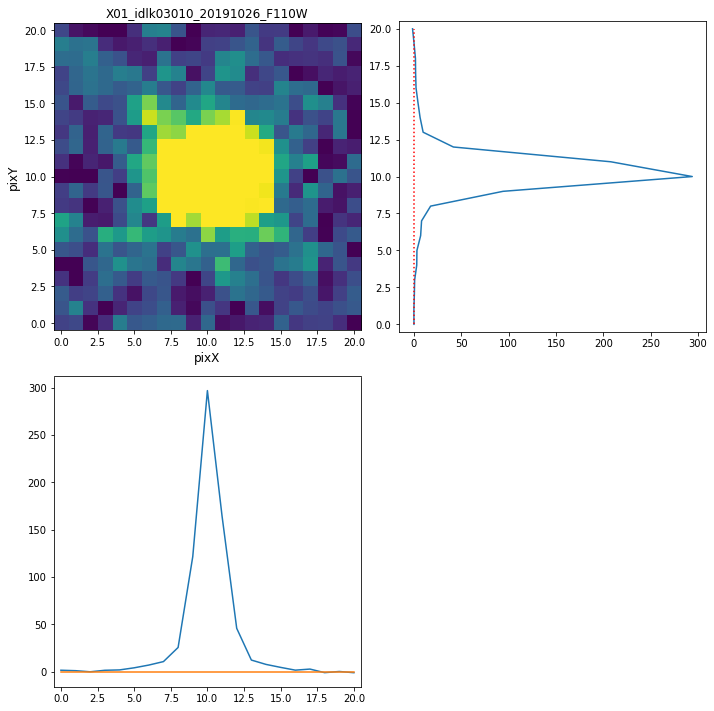

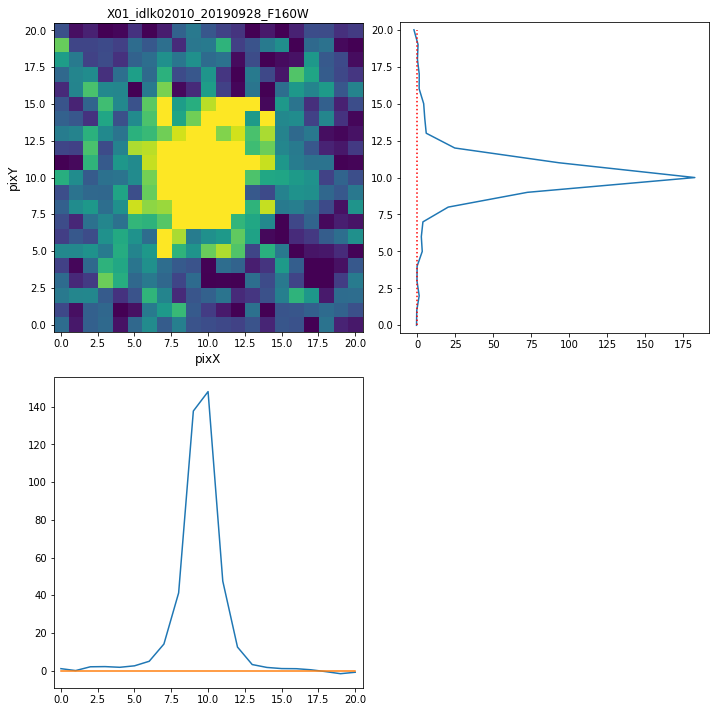

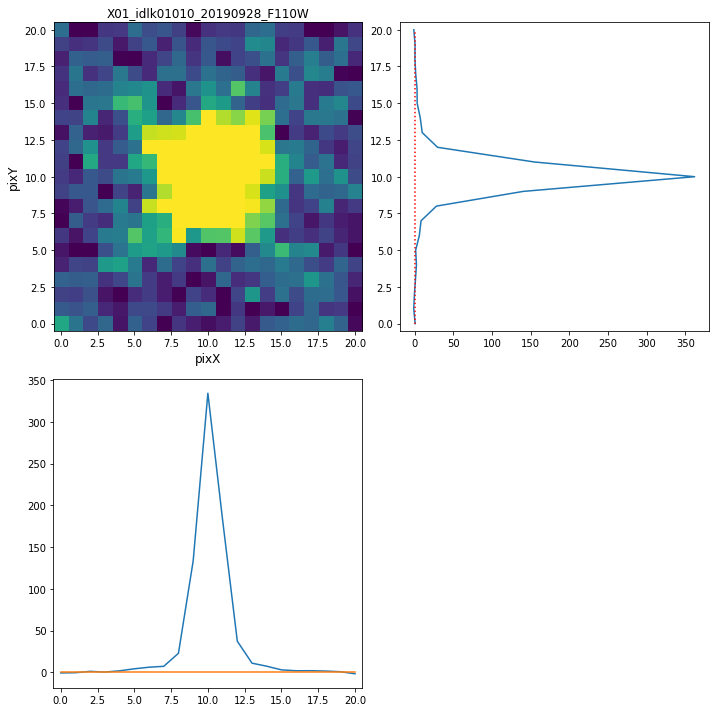

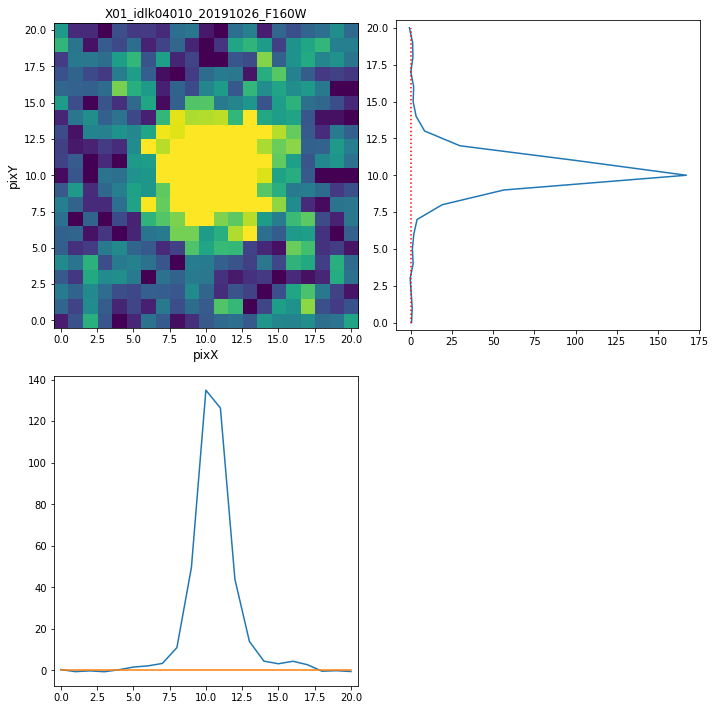

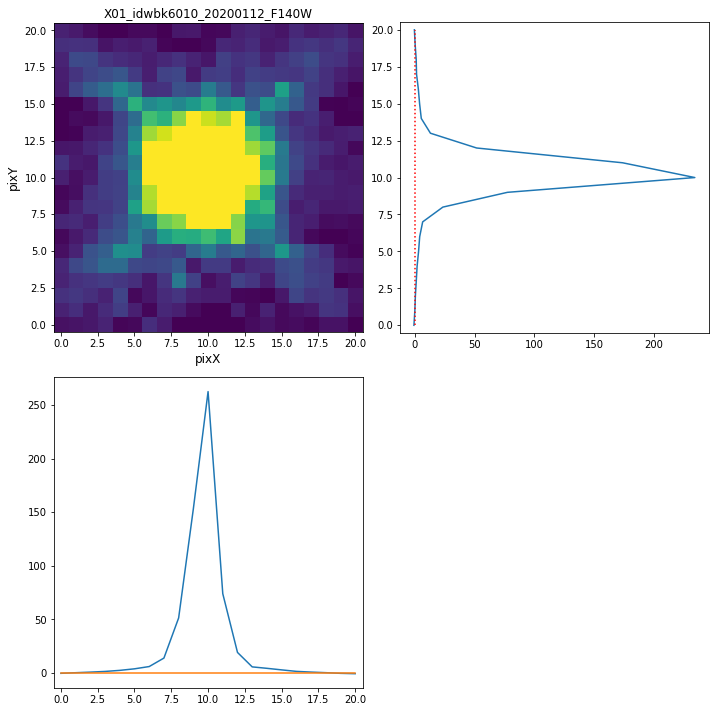

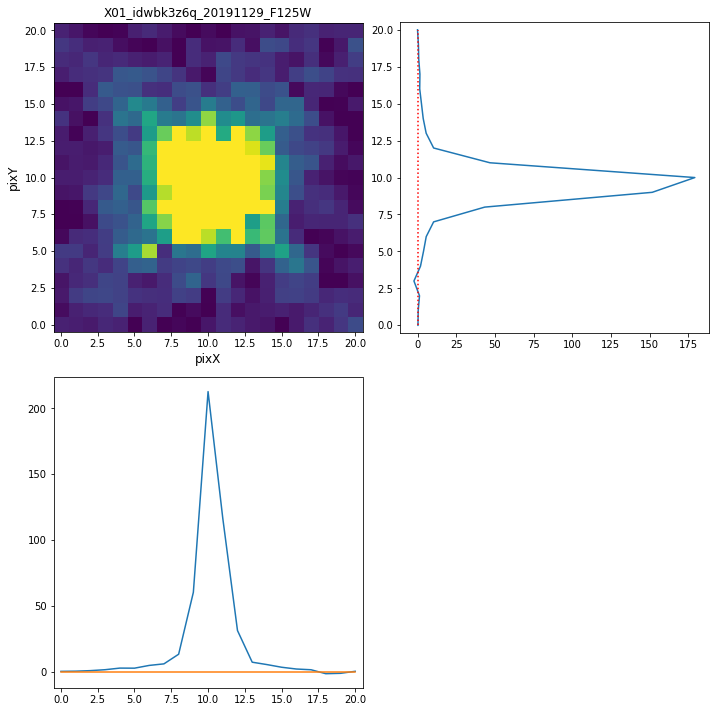

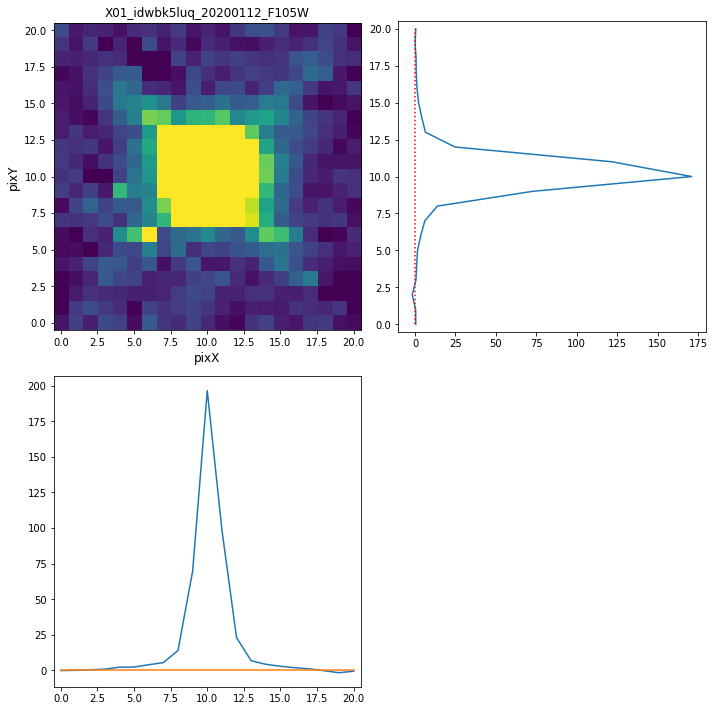

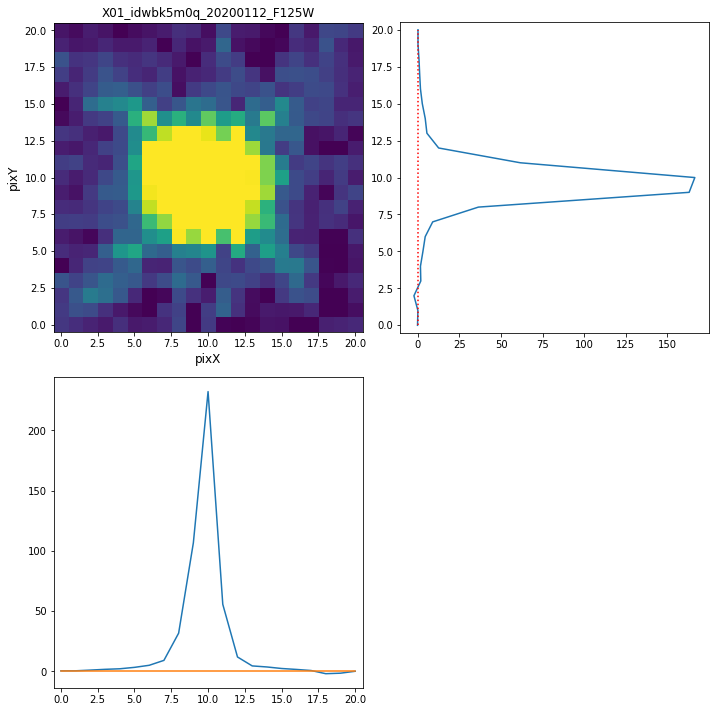

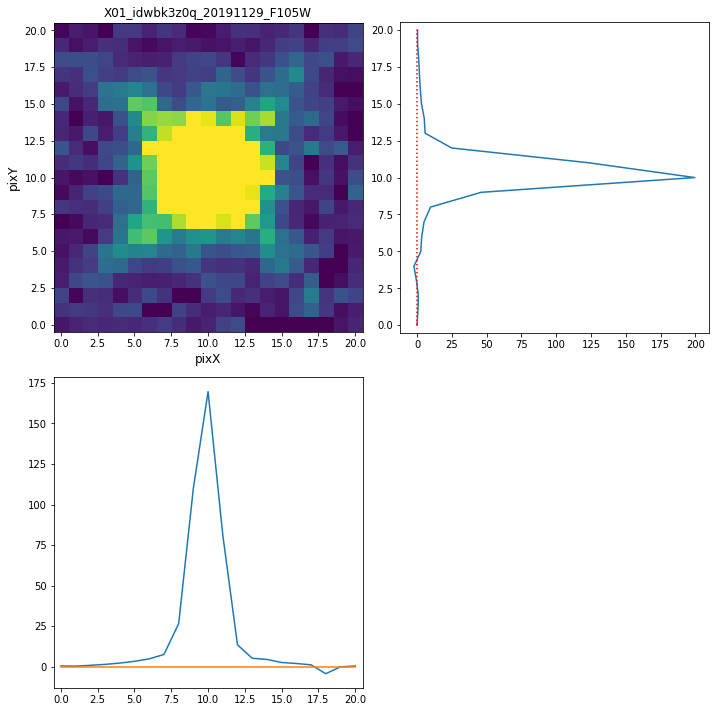

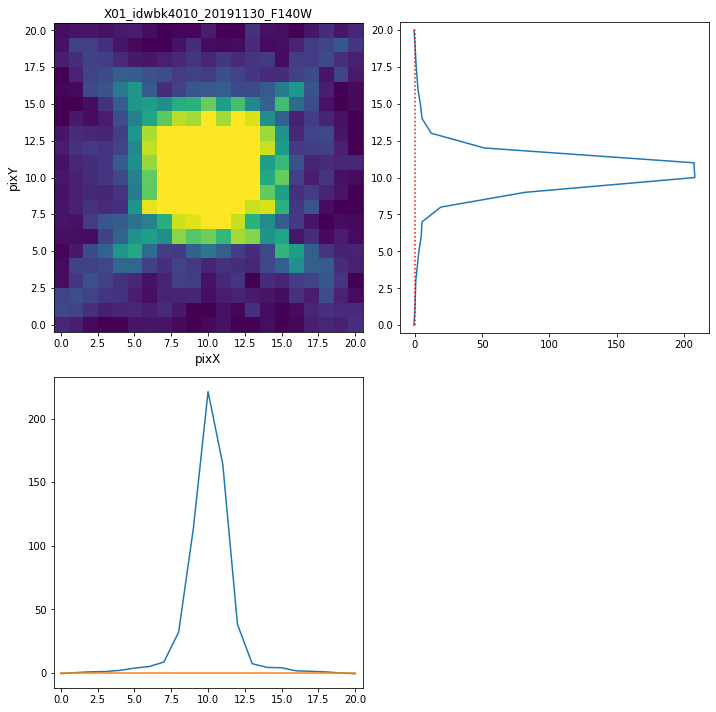

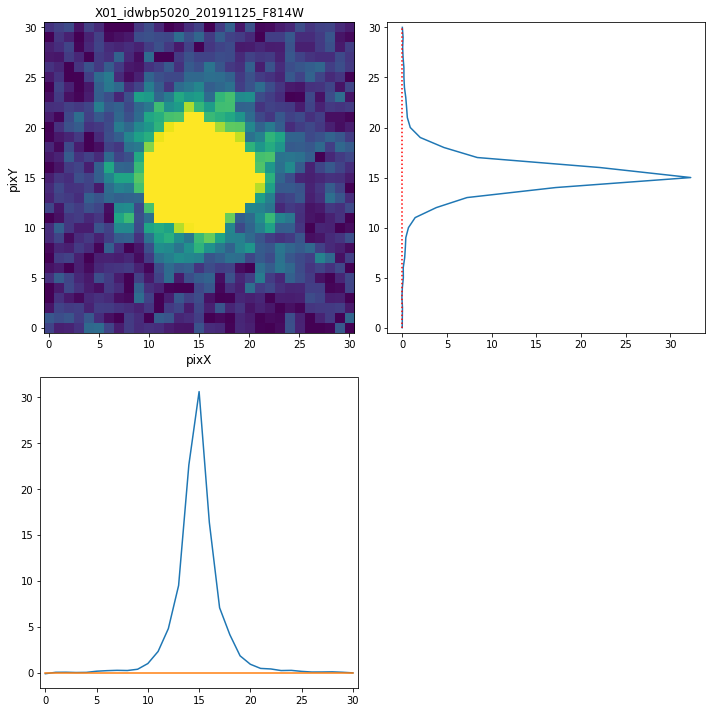

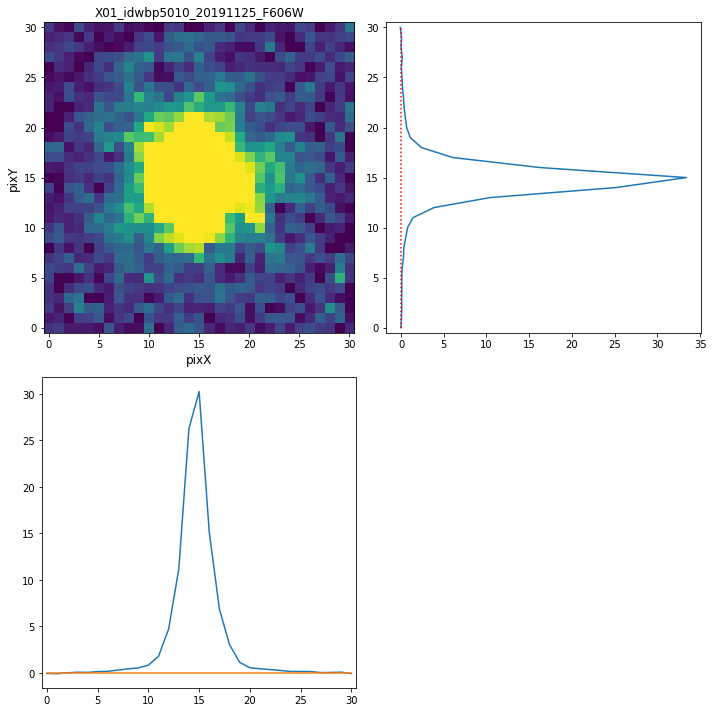

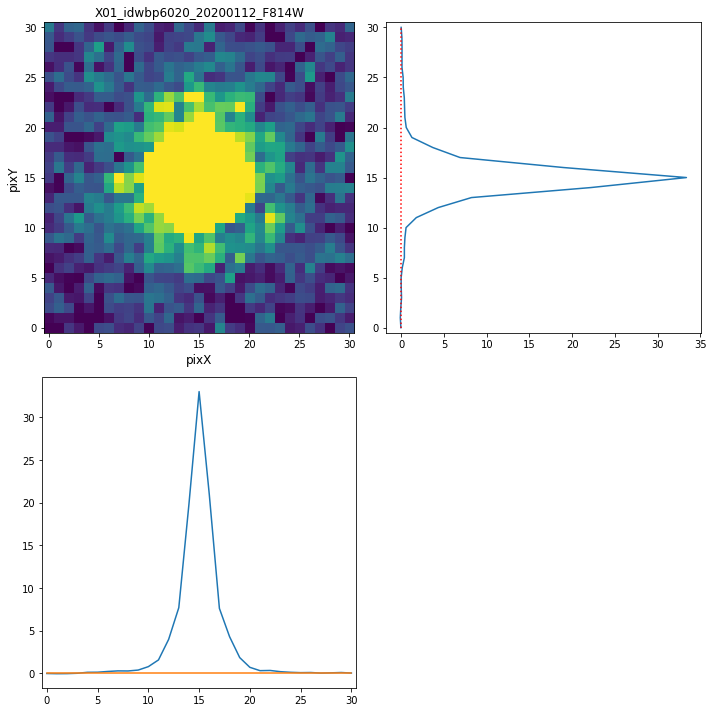

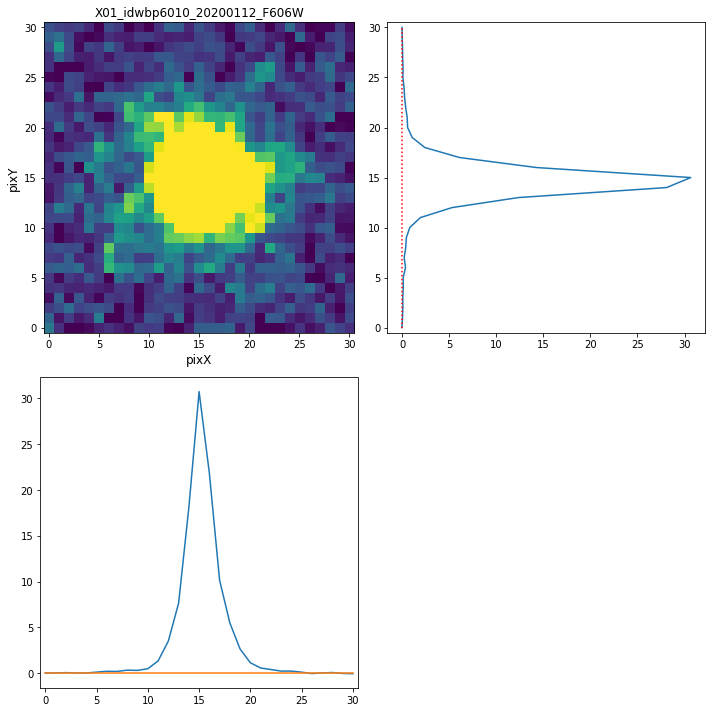

In [10]:
##########
# show_sum1d
##########
for i in filelist:
    for jj,j in enumerate(filelist[i]):
        identifier = idlist[i][jj]
        title = '{0}_{1}'.format(sourcename,identifier)
        gdata = cutoutlist[i][jj].cut - bkglist[i][jj].poly2d.model['YFIT']
        objname = title
        show_sum1d(gdata,objname)
        

In [11]:
##########
# ApPhot
##########
aperture_radius_list = {'15089_IR':6,
                        '15510_IR':6,
                        '15510_UVIS':10
                       }
sourcename = 'X01'
apphot_obj_list = {}
apphot_bkg_list = {}
for i in filelist:
    tto = []
    ttb = []
    for jj,j in enumerate(filelist[i]):
        identifier = idlist[i][jj]
        title = '{0}_{1}'.format(sourcename,identifier)
        odata = cutoutlist[i][jj].cut
        bdata = bkglist[i][jj].poly2d.model['YFIT']
        effgain = fits.open(filelist[i][jj])[0].header['EXPTIME']
        center = centerlist[i][jj]
        aperture_radius = aperture_radius_list[i]
        to = ApPhot(data=odata,ebkg=0.,effgain=effgain,center=center,aperture_radius=aperture_radius)
        to.compute()
        tb = ApPhot(data=bdata,ebkg=0.,effgain=effgain,center=center,aperture_radius=aperture_radius)
        tb.compute()
        tto.append(to)
        ttb.append(tb)
    apphot_obj_list[i] = tto
    apphot_bkg_list[i] = ttb
        

In [12]:
##########
# Subtract
##########
apphot_sub_list = {}
for i in filelist:
    tt = []
    for jj,j in enumerate(filelist[i]):
        identifier = idlist[i][jj]
        title = '{0}_{1}'.format(sourcename,identifier)
        to = apphot_obj_list[i][jj]
        tb = apphot_bkg_list[i][jj]
        ts = to.apphot['phot_table']['aperture_sum'] - tb.apphot['phot_table']['aperture_sum']
        te = to.apphot['phot_table']['aperture_sum_err']
        t = {'aperture_sum':ts,'aperture_sum_err':te}
        tt.append(t)
    apphot_sub_list[i] = tt
        

In [13]:
##########
# Phot2ABmag
##########
instrument_list = {'15089_IR':'HST-WFC3-IR',
                   '15510_IR':'HST-WFC3-IR',
                   '15510_UVIS':'HST-WFC3-UVIS'
                  }
maglist = {}
for i in filelist:
    tt = []
    for jj,j in enumerate(filelist[i]):
        identifier = idlist[i][jj]
        title = '{0}_{1}'.format(sourcename,identifier)
        instrument = instrument_list[i]
        filterobs = fits.open(filelist[i][jj])[0].header['FILTER']
        aperture_radius = aperture_radius_list[i]
        cps = apphot_sub_list[i][jj]['aperture_sum']
        error = apphot_sub_list[i][jj]['aperture_sum_err']
        t = Phot2ABmag(instrument,filterobs,aperture_radius,cps,error)
        t.compute()
        tt.append(t)
    maglist[i] = tt
        

Save ./X01_mag.pdf


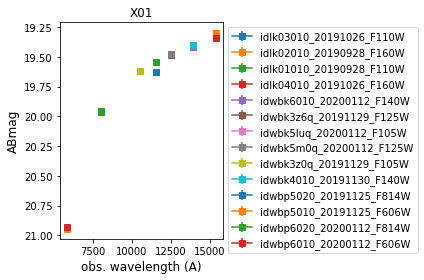

In [14]:
##########
# show
##########
plt.figure()
for i in filelist:
    for jj,j in enumerate(filelist[i]):
        identifier = idlist[i][jj]
        title = '{0}_{1}'.format(sourcename,identifier)
        t = maglist[i][jj]
        tx,ty,te = t.wavelength,t.mag[0][0],t.mag[1][0]
        plt.errorbar(tx,ty,te,marker='s',label=identifier)
plt.legend(bbox_to_anchor=(1.,1.),fontsize=10)
plt.gca().invert_yaxis()
plt.xlabel('obs. wavelength (A)',fontsize=12)
plt.ylabel('ABmag',fontsize=12)
plt.title('{0}'.format(sourcename),fontsize=12)
plt.tight_layout()
string = './X01_mag.pdf'
plt.savefig(string,plotformat='pdf',bbox_inches='tight')
print('Save {0}'.format(string))
        

# Summary 1
X01 tends to be a stable star.

# VizieR search
We searched in VizieR using RA,DEC = 2:58:11.6845,-8:57:23.516 (ICRS) for X01 by limiting 0.1 arcmin radius search, and we got the results:
- X01 is recorded in The Guide Star Catalog, Version 2.3.2, which was a joint project that STScI was a part of. [Reference](https://ui.adsabs.harvard.edu/abs/2008AJ....136..735L/abstract).
- more ...


# DS9 catalog
Using catalogs in DS9, we found:
- NED -- 2MASS J02581083-0857174 as a star with 20.1 magnitude in g.
- 2MASS -- JHK = 16.372,16.044,15.593
- SDSS DR12 -- J025811.68-085723.3 as a star, ObsDate 1999.7822, ugriz = 24.609, 21.770, 20.617, 20.067, 19.724


Save ./X01_magWithSDSS.pdf


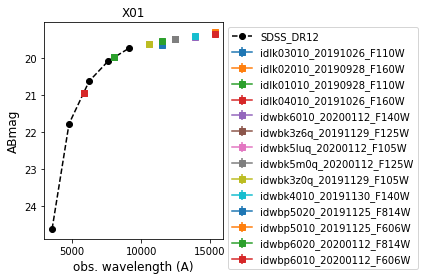

In [16]:
##########
# show SDSS DR12 ugriz
##########
ugriz_wavelength = (3543.,4770.,6231.,7625.,9134.)
ugriz_mag = (24.609,21.770,20.617,20.067,19.724)
plt.figure()
for i in filelist:
    for jj,j in enumerate(filelist[i]):
        identifier = idlist[i][jj]
        title = '{0}_{1}'.format(sourcename,identifier)
        t = maglist[i][jj]
        tx,ty,te = t.wavelength,t.mag[0][0],t.mag[1][0]
        plt.errorbar(tx,ty,te,marker='s',label=identifier)
plt.plot(ugriz_wavelength,ugriz_mag,'ko--',label='SDSS_DR12')
plt.legend(bbox_to_anchor=(1.,1.),fontsize=10)
plt.gca().invert_yaxis()
plt.xlabel('obs. wavelength (A)',fontsize=12)
plt.ylabel('ABmag',fontsize=12)
plt.title('{0}'.format(sourcename),fontsize=12)
plt.tight_layout()
string = './X01_magWithSDSS.pdf'
plt.savefig(string,plotformat='pdf',bbox_inches='tight')
print('Save {0}'.format(string))
        